In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    d = len(x)
    return sum(100 * (x[i+1] - x[i] ** 2) ** 2 + (x[i] - 1) ** 2 for i in range(d-1))
    
def grad(f, x):
    h = np.cbrt(np.finfo(float).eps) # np.cbrt 為 cube matrix 開三次方，np.finfo 獲得某類型的資訊，eps 使 1.0 + eps = 1.0
    d = len(x)
    nabla = np.zeros(d)
    
    for i in range(d):
        x_for = np.copy(x)
        x_back = np.copy(x)
        x_for[i] += h
        x_back[i] -= h
        nabla[i] = (f(x_for) - f(x_back)) / (2 * h)
        
    return nabla

def line_search(f, x, p, nabla):
    a = 1
    c1 = 1e-4
    c2 = 0.9
    fx = f(x)
    x_new = x + a * p
    nabla_new = grad(f, x_new)
    while (f(x_new) >= fx + (c1 * a * nabla.T @ p)) or (nabla_new.T @ p <= c2 * nabla.T @ p):
        a *= 0.5
        x_new = x + a * p
        nabla_new = grad(f, x_new)
    
    return a

In [7]:
def BFGS(f, x0, N_max, plot= False):
    d = len(x0)
    nabla = grad(f, x0)
    H = np.eye(d)
    x = x0[:]
    n = 2
    if plot == True:
        if d == 2:
            x_store = np.zeros((1, 2))
            x_store[0, :] = xbfgs.ipynb
        else:
            print('Too many dimension to prodce trajectory plot!')
            plot = False
            
    while np.linalg.norm(nabla) > 1e-5:
        if n > N_max:
            print('Maximum iterations reached!')
            break
        
        n += 1
        p = - H @ nabla
        a = line_search(f, x, p, nabla)
        print(f'step size:{a}')
        s = a * p
        x_new = x + a * p
        nabla_new = grad(f, x_new)
        y = nabla_new - nabla
        y = np.array([y])
        #s = np.array([s])
        y = np.reshape(y, (d, 1))
        #s = np.reshape(s, (d, 1))
        s = np.array(x_new - x).reshape((-1, 1))
        r = 1 / (y.T @ s)
        li = np.eye(d) - (r * (s @ y.T))
        ri = np.eye(d) - (r * (y @ s.T))
        hess_inter = li @ H @ ri
        H = hess_inter + (r * (s @ s.T))
        print(f'Hessian matrix:\n{H}')
        nabla = nabla_new[:]
        x = x_new[:]
        
        if plot == True:
            x_store = np.append(x_store, [x], axis= 0)
            
    if plot == True:
        x1 = np.linspace(min(x_store[:, 0] - 0.5), max(x_store[:, 0] + 0.5), 30)
        x2 = np.linspace(min(x_store[:, 1] - 0.5), max(x_store[:, 1] + 0.5), 30)
        X1, X2 = np.meshgrid(x1, x2)
        Z = f([X1, X2])
        plt.figure()
        plt.title('OPTIMAL AT: ' + str(x_store[-1, :]) + '\n IN ' + str(len(x_store)) + ' ITERATIONS')
        plt.contourf(X1, X2, Z, 30, cmap= 'jet')
        plt.colorbar()
        plt.plot(x_store[:, 0], x_store[:, 1], c= 'w')
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.show()
    
    return x

step size:0.0009765625
Hessian matrix:
[[ 0.15726986 -0.36318155]
 [-0.36318155  0.84392179]]
step size:0.125
Hessian matrix:
[[ 0.04040489 -0.08404467]
 [-0.08404467  0.17721747]]
step size:1
Hessian matrix:
[[ 0.08025285 -0.1191991 ]
 [-0.1191991   0.18289984]]
step size:1
Hessian matrix:
[[ 0.04540479 -0.05354905]
 [-0.05354905  0.06898979]]
step size:1
Hessian matrix:
[[ 0.03913533 -0.03854108]
 [-0.03854108  0.04291106]]
step size:1
Hessian matrix:
[[ 0.14067705 -0.14079808]
 [-0.14079808  0.14370633]]
step size:0.25
Hessian matrix:
[[ 0.04726367 -0.04040989]
 [-0.04040989  0.03667359]]
step size:1
Hessian matrix:
[[ 0.06606115 -0.03896096]
 [-0.03896096  0.03021409]]
step size:1
Hessian matrix:
[[ 0.11569123 -0.05578371]
 [-0.05578371  0.03553672]]
step size:0.5
Hessian matrix:
[[ 0.09842244 -0.01263975]
 [-0.01263975  0.00728262]]
step size:1
Hessian matrix:
[[0.06710964 0.0067859 ]
 [0.0067859  0.0113429 ]]
step size:1
Hessian matrix:
[[0.09936173 0.03334717]
 [0.03334717 0.016

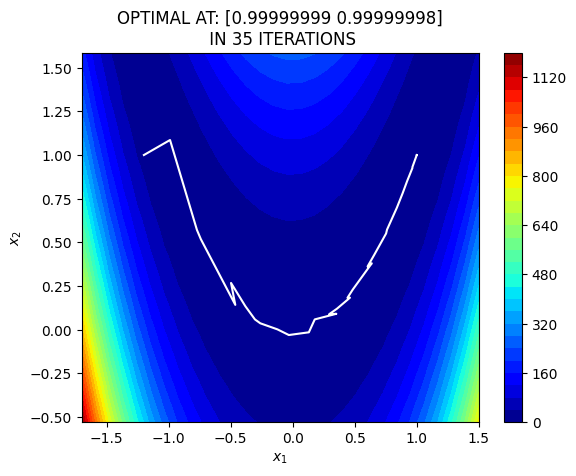

In [8]:
x_opt = BFGS(f, [-1.2, 1], 100, plot= True)